In [19]:
import os
import pandas as pd
import tensorflow
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed


from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

                                                                    #Data Preprocessing  
data_dir = 'D:\\bearing_fault_data\\normal'
merged_data = pd.DataFrame()
counter = 1
for filename in os.listdir(data_dir):#each for loop reads millions of data points from each fault catagory
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)

    tmp_dataset_squared = np.square(dataset)
    tmp_dataset_mean = np.array(tmp_dataset_squared.mean())
    dataset_mean_abs = np.sqrt(tmp_dataset_mean)

    # dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 0                        #Add manual Label based on data folder
    counter = counter+1
    
    merged_data = merged_data.append(dataset_mean_abs)

data_dir = 'D:\\bearing_fault_data\\imbalance\\6g'
#merged_data = pd.DataFrame()
print(counter)
for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)

    tmp_dataset_squared = np.square(dataset)
    tmp_dataset_mean = np.array(tmp_dataset_squared.mean())
    dataset_mean_abs = np.sqrt(tmp_dataset_mean)

    # dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 1
    counter = counter+1
    merged_data = merged_data.append(dataset_mean_abs)

data_dir = 'D:\\bearing_fault_data\\overhang\\ball_fault\\0g'
#merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)

    tmp_dataset_squared = np.square(dataset)
    tmp_dataset_mean = np.array(tmp_dataset_squared.mean())
    dataset_mean_abs = np.sqrt(tmp_dataset_mean)

    # dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 2
    counter = counter+1
    merged_data = merged_data.append(dataset_mean_abs)

print(counter)


50
148


In [20]:
print(merged_data)

           0         1         2          3         4         5         6  \
0   1.585549  0.979180  0.307371   0.044810  0.668828  0.030364  0.197575   
0   1.596106  1.245584  0.309477   0.046528  0.893784  0.030156  0.284262   
0   1.598833  1.327238  0.306285   0.049383  0.812289  0.031505  0.198623   
0   1.612533  1.291966  0.309720   0.051198  0.847367  0.030815  0.208231   
0   1.625215  1.136211  0.326869   0.054969  0.791769  0.029374  0.266956   
..       ...       ...       ...        ...       ...       ...       ...   
0   1.809397  6.216226  5.095528  10.107535  1.067451  1.086736  1.147758   
0   1.813454  6.483646  5.110757  10.291355  1.078970  1.201462  1.173774   
0   1.841016  6.652789  4.803541  10.412009  1.080347  1.338769  1.219827   
0   1.840769  6.796370  4.663132  10.498356  1.118588  1.434415  1.257018   
0   1.900677  7.132938  4.711963  10.657422  1.068375  1.418228  1.266404   

           7  FaultType  
0   0.112425          0  
0   0.116036          0

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

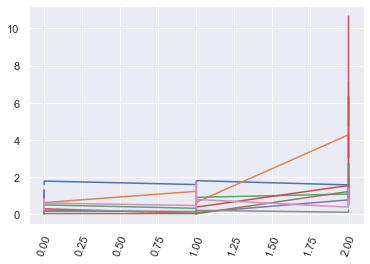

In [ ]:



num_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2', 'FaultType']
merged_data.reset_index(drop=True, inplace=True)
#merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
#merged_data.index = pd.to_datetime(merged_data.index, format='UTC')
#merged_data = merged_data.sort_index()
merged_data.to_csv('Imb1.csv')
#merged_data.index.names = ['index']
#merged_data.head()
num_cols = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2']

dataset_train = merged_data #['2004-02-12 11:02:39':'2004-02-13 23:52:39']
#dataset_test = merged_data['2004-02-13 23:52:39':]
#dataset_train.plot(merged_data.loc[:,"date"], merged_data.loc[:,"Bearing 1"], figsize = (12,6))
plt.plot(merged_data["FaultType"], merged_data[num_cols])
plt.xticks(rotation=70)


In [22]:
merged_data.tail(n=25)

,Bearing 1-1,Bearing 1-2,Bearing 2-1,Bearing 2-2,Bearing 3-1,Bearing 3-2,Bearing 4-1,Bearing 4-2,FaultType
122,1.722088,3.994993,2.214716,4.986876,1.363418,1.547644,0.985728,0.186478,2
123,1.742276,4.105281,2.099206,5.486218,1.282278,1.540595,0.985832,0.189679,2
124,1.735611,4.274172,2.312766,5.151042,1.180404,1.311348,0.862909,0.191219,2
125,1.748323,4.240207,2.431570,5.352230,1.142562,1.135027,0.853685,0.193818,2
126,1.745030,4.510514,2.702263,5.548489,0.836646,1.147598,0.867587,0.197960,2
127,1.742365,5.900442,2.461580,5.301361,0.952079,1.787319,1.067370,0.198522,2
128,1.747532,6.462083,2.556083,5.907594,1.166540,1.862931,1.111823,0.199702,2
129,1.765823,6.883903,2.900244,6.670312,1.321202,1.852198,1.142954,0.201660,2
130,1.826606,4.845290,2.859587,7.266505,1.337996,1.285787,1.008477,0.206427,2
131,1.767618,4.295312,2.730961,7.981439,1.107538,1.281038,1.114093,0.210704,2


In [23]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

dataset = merged_data.values
scaler = StandardScaler()
X = dataset[:,0:8].astype(float)
X = scaler.fit_transform(X)
Y = dataset[:,8].astype(int)
# print(type(Y[0]))

# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

linear = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

linear_pred = linear.predict(X_test)

accuracy_lin = linear.score(X_test, y_test)
print(accuracy_lin)

cm_lin = confusion_matrix(y_test, linear_pred)

print(cm_lin)













1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
